<a href="https://colab.research.google.com/github/Teasotea/IASA_IntellectualDecisionSupportSystems/blob/main/ISPPR_Lab2_datasetA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема: Навчання регресiйної моделi методами градiєнтного спуску в TensorFlow Основи API Keras (tf.keras). Використання tf.data – API Dataset.
### Варіант 20

Перед виконанням роботи розібрати код у наступній послідовності:

Розпаралелювання процесу навчання нейронних мереж в TensorFlow. 
Побудова нейромережевої моделі в TensorFlow 2 для класифікації та регресії. 
Основи API Keras (tf.keras)

1. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch13/ch13_part1.py

2. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch13/ch13_part2.py

3. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch13/ch13_part3.py

4. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch14/ch14_part1.py

5. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch14/ch14_part2.py

6. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch14/ch14_part3.py

Є версії ipynb: https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch13 
https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch14

Sebastian Raschka, Vahid Mirjalili. Python Machine Learning. Third Edition. Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2. Packt Publishing, 2019.



## Хiд виконання роботи

Написати програму, яка задає i навчає регресiйну модель методами градiєн-
тного спуску:

1. Завантажити початковi данi.
2. Представити данi графiчно.
3. Iнiцiалiзувати параметри: швидкiсть навчання, кiлькiсть епох (=100)к iлькiсть пакетiв i параметр регуляризацiї.
4. Iнiцiалiзувати вектор параметрiв.
5. Реалiзувати функцiю, яка задає модель, наприклад полiномiальну регресiю
6. Задати функцiю втрат: MSE з регуляризацiєю за нормами L1.
7. Задати операцiю, яка буде викликатися на кожнiй iтерацiї алгоритма мiнi-пакетного градiєнтного спуску
8. Виконати навчання моделi.
9. Виводити значення функцiї втрат через кожнi 10 епох.
10. Зберегти контрольнi точки через регулярнi iнтервали пiд час навчання. В кiнцi навчання зберегти результуючу модель. Вiдновити останню
контрольну точку при запуску, якщо навчання було перервано.
11. Налаштувати гiперпараметр швидкiсть навчання i додатково розмiр мiнi-пакета. Подивитися на форму кривої
навчання.
12. Дослiдити рiзнi значення параметра регуляризацiї i пiдiбрати найкраще
з них, якщо згiдно з варiантом.

13. Побудувати графiк з початковими даними та лiнiєю регресiї.


Згідно з варіантом: Полiномiальна регресiя, алгоритм градiєнтного спуску за мiнi-батчами,
MSE з регуляризацiєю за нормою L1.
Початковi данi:

(а) X_data = np.linspace(−1,1,100)
num_coef=5
coef =[ 10 , 20 , 3 , 40 , 5]
y_data=0
for i in range( num_coef ) :
y_data += coef[ i ] ∗ np.power(X_data, i )
y_data += np.random.randn(∗X_data.shape) ∗ 2.5

(б) sklearn.datasets.load_boston

# Завантажимо дані та представимо їх графічно

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import random

import pickle
import datetime 
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_data = np.linspace(-1,1,100)
num_coef=5
coef =[ 10 , 20 , 3 , 40 , 5]
y_data=0
for i in range( num_coef ): 
  y_data += coef[ i ] * np.power(X_data, i) 
y_data += np.random.randn(*X_data.shape) * 2.5

In [ ]:
df = pd.DataFrame([X_data, y_data]).T
df.columns = ['X', 'Y']

In [ ]:
df.describe()

,X,Y
count,1.000000e+02,100.000000
mean,8.215650e-17,12.019035
std,5.860907e-01,27.434258
min,-1.000000e+00,-45.299634
25%,-5.000000e-01,-4.233720
50%,5.551115e-17,9.978452
75%,5.000000e-01,25.202724
max,1.000000e+00,79.528934


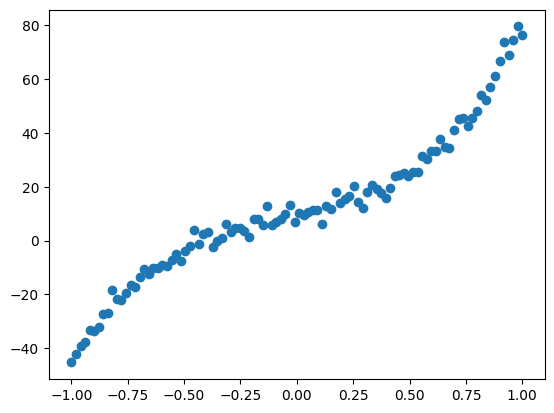

In [ ]:
plt.scatter(df.X, df.Y)

Бачимо, що графік нагадує поліноміальну функцію 3го порядку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.X.to_numpy().reshape(-1,1), df.Y.to_numpy().reshape(-1,1), test_size=0.20, random_state=42)

In [ ]:
print("Навчальна вибірка: ", X_train.shape, y_train.shape)
print("Тестова вибірка: ", X_test.shape, y_test.shape)

Навчальна вибірка:  (80, 1) (80, 1)
Тестова вибірка:  (20, 1) (20, 1)


 # Побудова моделі, збереження чек-поінтів

Будемо використовувати лінійну регресійну модель з такими базисними функціями: $\{ 1, x, x^2, x^3\}$:

$$ f(x) = \omega_1 x^3 + \omega_2 x^2 + \omega_3 x + \omega_4$$

функція втрат:

$$ LOSS = \cfrac{1}{n} \sum \limits_{i = 1}^n \left(y_{true}^{(i)} - f(x^{(i)}) \right)^2 + \lambda \sum \limits_{i = 1}^{n} | w_i|$$


In [ ]:
class PolynomialRegression:
    def __init__(self, degree, learning_rate=0.01, batch_size=32, lambda_=0.01, max_iter=1000, models_dir = "tr"):
        if not os.path.exists("Saved Models"):
            os.makedirs("Saved Models")
        self.models_dir = models_dir

        self.degree = degree
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.theta = None

    def fit(self, X, y):

        current_time = datetime.datetime.now()
        current_time = current_time.strftime("%d-%m-%Y_%H-%M-%S-%f")
        path = os.path.join("Saved Models", current_time )
        self.models_dir = path
        os.makedirs(path)

        X_poly = self._polynomial_features(X)
        m, n = X_poly.shape

        self.theta = np.zeros(n)
        num_batches = int(np.ceil(m / self.batch_size))

        for j in range(self.max_iter):

            for i in range(num_batches):
                start = i * self.batch_size
                end = (i + 1) * self.batch_size
                X_batch = X_poly[start:end]
                y_batch = y[start:end]
                
                gradients = self._compute_gradients(X_batch, y_batch)
                self.theta -= self.learning_rate * gradients

            if j%10 == 0:
                print(f"epoch {j} \t loss = {self._compute_loss(X_poly, y)}")
                saved_model = PolynomialRegression(gradients, self.models_dir)
                model_path  = os.path.join(self.models_dir, str(j))
                file = open(model_path, "wb")
                pickle.dump(saved_model, file)
                file.close()
            
        return gradients

    def predict(self, X):
        X_poly = self._polynomial_features(X)
        return np.dot(X_poly, self.theta)

    def _polynomial_features(self, X):
        m = X.shape[0]
        X_poly = np.ones((m, self.degree + 1))

        for d in range(1, self.degree + 1):
            X_poly[:, d] = np.power(X, d)

        return X_poly

    def _compute_gradients(self, X, y):
        m, n = X.shape
        predictions = np.dot(X, self.theta)
        errors = predictions - y

        gradients = (1 / m) * np.dot(X.T, errors)
        gradients[1:] += (self.lambda_ / m) * np.sign(self.theta[1:])

        return gradients

    def _compute_loss(self, X, y):
        m = X.shape
        predictions = np.dot(X, self.theta)
        errors = predictions - y
        mse_loss = np.mean(np.square(errors))
        regularization_term = self.lambda_ * np.sum(np.abs(self.theta[1:]))
        loss = mse_loss + regularization_term

        return loss

    def load_models(self):
        models = {"epoch": [], "model": []}
        for file in os.listdir(self.models_dir):
            file_path = os.path.join(self.models_dir, file)
            
            with open(file_path, "rb") as f:
                model = pickle.load(f)
            
            models["epoch"].append(int(file))
            models["model"].append(model)
        
        return models

In [ ]:
train_df = pd.DataFrame([np.squeeze(X_train), np.squeeze(y_train)]).T
train_df.columns = ['X', 'Y']
test_df = pd.DataFrame([np.squeeze(X_test), np.squeeze(y_test)]).T
test_df.columns = ['X', 'Y']

In [ ]:
model = PolynomialRegression(degree=3, learning_rate=0.1, batch_size=2, lambda_=0.01, max_iter=100)
model.fit(train_df.X, train_df.Y)

epoch 0 	 loss = 31.487036690901977
epoch 10 	 loss = 10.273549631609011
epoch 20 	 loss = 7.919965827725137
epoch 30 	 loss = 7.299963991204913
epoch 40 	 loss = 7.130606812739533
epoch 50 	 loss = 7.081481494035259
epoch 60 	 loss = 7.06589770840353
epoch 70 	 loss = 7.060368592361077
epoch 80 	 loss = 7.058171840555703
epoch 90 	 loss = 7.057214713571451


array([0.83356926, 0.50819446, 0.43059636, 0.37021589])

In [ ]:
y_pred = model.predict(test_df.X)
y_true = test_df.Y

In [ ]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(test_df.Y, y_pred)

# Print evaluation results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 4.304358380041828
Root Mean Squared Error (RMSE): 2.0746947679217365
Mean Absolute Error (MAE): 1.713685059293016
R-squared (R2) Score: 0.9925875484638506


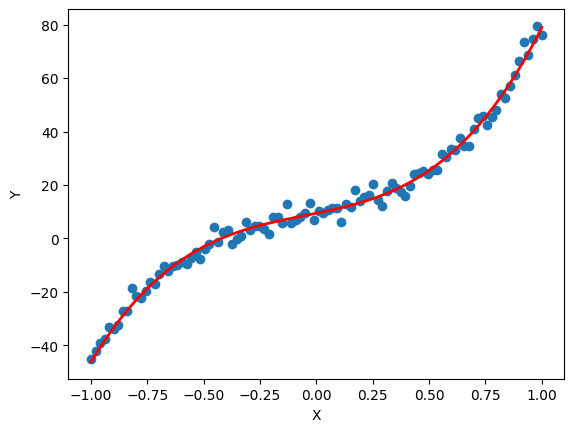

In [ ]:
ax = plt.axes()
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.plot(X_data, model.predict(df.X), linewidth= 2, color = "r");
plt.scatter(X_data, y_data);
plt.show()

# Налаштування гіперпараметрів

Будемо налаштовувати такі параметри, як: `learning_rate`, `batch_size`

Напишемо власну функцію для рещітчастого пошуку

In [ ]:
learning_rates = [0.01, 0.1, 0.5]
batch_sizes = [2, 4, 8, 16]

In [ ]:
def grid_search_polynomial_regression(lr, bs):
    mses = []
    for r in lr:
      for s in bs:
          model = PolynomialRegression(degree=3, learning_rate=r, batch_size=s, lambda_=0.01, max_iter=100)
          model.fit(train_df.X, train_df.Y)
          y_pred = model.predict(test_df.X)
          y_true = test_df.Y
          mse = mean_squared_error(y_true, y_pred)

          mses.append([mse, r, s])

    return mses

In [ ]:
param_search = grid_search_polynomial_regression(learning_rates, batch_sizes)

epoch 0 	 loss = 594.612692355327
epoch 10 	 loss = 29.018370596409603
epoch 20 	 loss = 17.343295149203943
epoch 30 	 loss = 15.772505952850452
epoch 40 	 loss = 14.611879044425512
epoch 50 	 loss = 13.620911832670568
epoch 60 	 loss = 12.765223644048861
epoch 70 	 loss = 12.022417271970951
epoch 80 	 loss = 11.375541809017522
epoch 90 	 loss = 10.811147136912103
epoch 0 	 loss = 750.8037732527135
epoch 10 	 loss = 107.05338765026748
epoch 20 	 loss = 31.408386542461013
epoch 30 	 loss = 19.82356830113618
epoch 40 	 loss = 17.476869131667485
epoch 50 	 loss = 16.531802216257915
epoch 60 	 loss = 15.840185403344497
epoch 70 	 loss = 15.229358967377244
epoch 80 	 loss = 14.669394960326716
epoch 90 	 loss = 14.15179266497205
epoch 0 	 loss = 847.1386730874993
epoch 10 	 loss = 285.7899397533485
epoch 20 	 loss = 116.30849993146983
epoch 30 	 loss = 55.77963100536514
epoch 40 	 loss = 32.79531926149562
epoch 50 	 loss = 23.776892747989315
epoch 60 	 loss = 20.07564612621854
epoch 70 	 los

In [ ]:
print(param_search)

[[6.928183981035156, 0.01, 2], [10.32262921182199, 0.01, 4], [12.829007744278934, 0.01, 8], [16.769865558763545, 0.01, 16], [4.304358380041828, 0.1, 2], [4.298354788149386, 0.1, 4], [4.29592650671183, 0.1, 8], [5.925695232966335, 0.1, 16], [4.309160771266014, 0.5, 2], [4.092155340625886, 0.5, 4], [4.185630646855852, 0.5, 8], [4.247944997508681, 0.5, 16]]


Бачимо, що найкращий показник MSE (8.3347) дали параметри:

`learning_rate` = 0.1

`batch_size` = 4

Побудуємо графік для даної моделі:

In [ ]:
model = PolynomialRegression(degree=3, learning_rate=0.1, batch_size=4, lambda_=0.01, max_iter=100)
model.fit(train_df.X, train_df.Y)

epoch 0 	 loss = 119.03629895379572
epoch 10 	 loss = 13.356112005087674
epoch 20 	 loss = 10.179950128091077
epoch 30 	 loss = 8.576904513110614
epoch 40 	 loss = 7.762165038406914
epoch 50 	 loss = 7.347731122765961
epoch 60 	 loss = 7.136824457829691
epoch 70 	 loss = 7.02943481537311
epoch 80 	 loss = 6.974713484736275
epoch 90 	 loss = 6.946801047561418


array([ 0.35448902, -0.13789247,  0.31515806,  0.04777281])

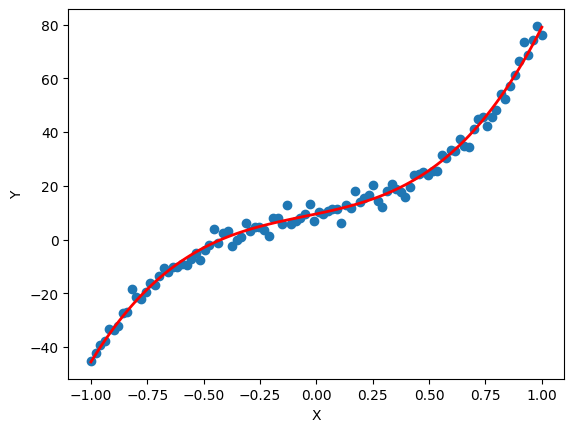

In [ ]:
ax = plt.axes()
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.plot(X_data, model.predict(df.X), linewidth= 2, color = "r");
plt.scatter(X_data, y_data);
plt.show()